In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from tqdm import tqdm

## Functions

In [2]:
# cost function
def H(Graph, color_map):
    cost = 0
    for (v, w) in Graph.edges():
        if color_map[v] == color_map[w]:
            cost += 1
    return cost

In [3]:
# returns n number of colors
def color_picker(n):
    options = np.array( ['b', 'g', 'r', 'c', 'm', 'y', 'k'] )
    return np.array( [options[i] for i in np.random.choice(options.size, n, replace=False)] )

In [4]:
# generate random color map
def gen_map(colors, n):
    return np.array( [np.random.choice(colors) for i in range(n)] )

In [5]:
# removes color x from list of colors and return another color other than x
def new_color(colors, x):
    return np.random.choice( np.setdiff1d(colors, x) )

In [6]:
def highest_degree(Graph):
    max = 0
    for (v,d) in Graph.degree():
        if d > max:
            max = d
    return max

def avg_degree(Graph):
    temp, total = Graph.degree(), 0
    for (v,d) in temp:
        total += d
    return total/Graph.order() 

In [16]:
def anneal(Graph, coloring, colors):
    init_temp = 50
    final_temp = 0
    alpha = .1
    beta = 0.95

    current_temp = init_temp
    current_state = coloring.copy()
    solution = current_state.copy()

    while(current_temp > final_temp):
        # pick random vertex
        vertex = np.random.randint(0, Graph.order()-1)
        
        # choose dif color from orig and re-color
        orig_color = current_state[vertex]
        current_state[vertex] = new_color(colors, orig_color)
        
        # compute cost
        cost = H(G, current_state) - H(G, solution)
        if cost <= 0:
            if np.random.uniform(0, 1) < np.exp(-cost/current_temp):
                solution = current_state.copy()
        elif cost > 0:
            if np.random.uniform(0, 1) < np.exp(-beta*cost):
                solution = current_state.copy()
        else:
            current_state[vertex] = orig_color
        # decrease temp
        current_temp -= alpha
        
    return solution

## Confifurations

In [17]:
colors = color_picker(3) # numb of possible colors (max 7)
iterations = 100

vert_count = 100
edge_count = vert_count
deg = 3

## Generate a Random Graph

In [18]:
# G = nx.gnm_random_graph(vert_count, edge_count)
G = nx.random_degree_sequence_graph([deg for i in range(vert_count)]) # degree sequence
# G = nx.configuration_model([deg for i in range(vert_count)])

# nx.is_graphical(G)

print(f"{G.order()} Vertices\nHighest deg: {highest_degree(G)} | Avg deg: {avg_degree(G)}")

if G.order() <= 10: # G.order number of nodes
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)

100 Vertices
Highest deg: 3 | Avg deg: 3.0


## Anneal

In [19]:
coloring = gen_map(colors, G.order())
min_cost = H(G, coloring)

raw_data = np.array([min_cost])
best_data = raw_data

for i in tqdm(range(iterations)):
    sol = anneal(G, coloring, colors)
    sol_cost = H(G, sol)
    raw_data = np.append(raw_data, sol_cost)
    if sol_cost < min_cost:
        coloring = sol
        min_cost = sol_cost
    best_data = np.append(best_data, min_cost)

print(f"min cost {H(G,coloring)}")

100%|██████████| 100/100 [00:16<00:00,  6.07it/s]

min cost 10


### * Graph

In [20]:
if G.order() <= 10:
    nx.draw(G, pos, node_color=coloring, with_labels=True)

### ** Plots

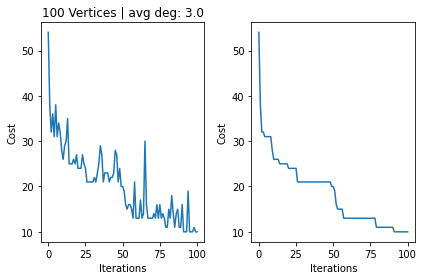

In [21]:
X = [ x for x in range(iterations+1)]

#fig = plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(X, raw_data)
plt.title(f"{G.order()} Vertices | avg deg: {avg_degree(G)}")
plt.xlabel("Iterations"), plt.ylabel("Cost")

#fig = plt.figure(2)
plt.subplot(1, 2, 2)
plt.plot(X, best_data)
plt.xlabel("Iterations"), plt.ylabel("Cost")

plt.tight_layout()

### Refined Data

In [22]:
coloring = gen_map(colors, G.order())
min_cost = H(G, coloring)

cost_data = np.array([min_cost])
avg = 5

for i in tqdm(range(iterations)):
    avg_run = np.array([])
    for j in range(avg):
        sol = anneal(G, coloring, colors)
        sol_cost = H(G, sol)
        avg_run = np.append(avg_run, sol_cost)
        if sol_cost < min_cost:
            coloring = sol
            min_cost = sol_cost
    cost_data = np.append(cost_data, np.average(avg_run))

# for i in range(iterations):
#     avg_run = np.array([])
#     for j in range(avg):
#         temp = list(anneal(G, color_map, colors))
#         temp_cost = H(G,temp)
#         avg_run = np.append(avg_run, temp_cost)
#         if temp_cost < min_cost:
#             color_map = temp.copy()
#             min_cost = temp_cost
#     cost_data.append(np.average(avg_run))

print(f"min cost {H(G,coloring)}")

100%|██████████| 100/100 [01:22<00:00,  1.21it/s]

min cost 2


### ** Plot

(Text(0.5, 0, 'Iterations'), Text(0, 0.5, 'Cost'))

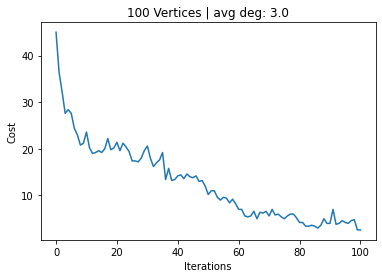

In [23]:
plt.plot([x for x in range(iterations+1)], cost_data)
plt.title(f"{G.order()} Vertices | avg deg: {avg_degree(G)}")
plt.xlabel("Iterations"), plt.ylabel("Cost")